In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mushroom = pd.read_csv('mushroom.csv')
mushroom.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [ ]:
print("Information about the dataset")
print(mushroom.info())
print(mushroom.describe())
print("Checking the null values in the columns")
print(mushroom.isnull().sum())

Information about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 no

<Figure size 1500x1000 with 0 Axes>

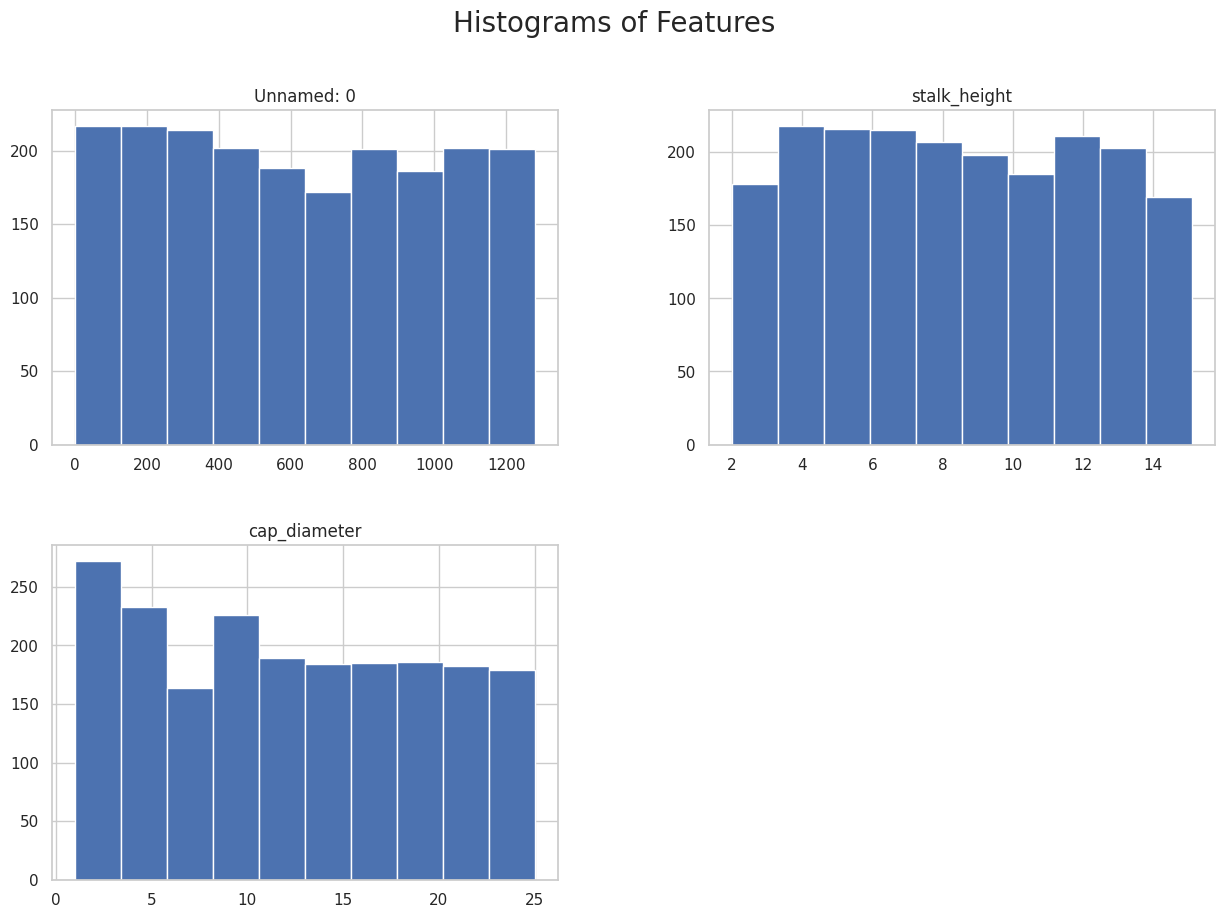

In [ ]:
# Histograms for each feature (for a limited number of features)
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
mushroom.hist(figsize=(15, 10), bins=10)
plt.suptitle('Histograms of Features', fontsize=20)
plt.show()

Information about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 no

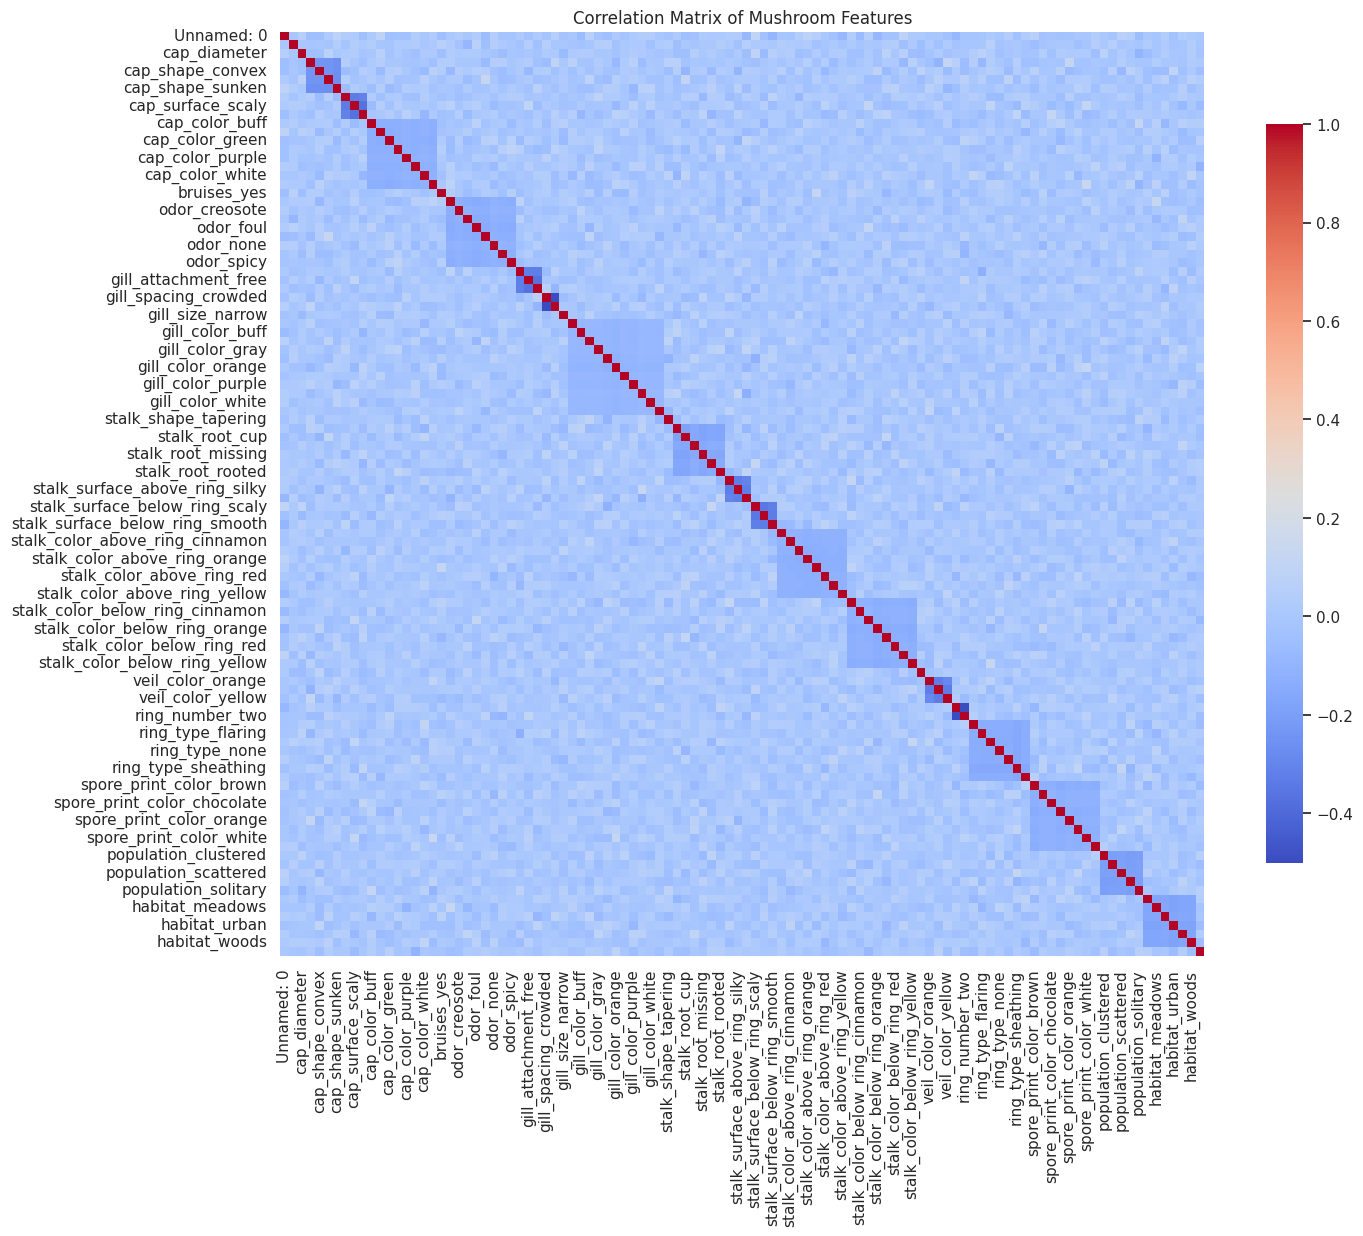


Mutual Information Scores:
stalk_height                      0.223107
Unnamed: 0                        0.220794
cap_diameter                      0.192004
stalk_surface_below_ring_silky    0.030677
stalk_surface_above_ring_silky    0.022403
                                    ...   
odor_anise                        0.000000
gill_color_purple                 0.000000
veil_color_orange                 0.000000
bruises_yes                       0.000000
cap_shape_flat                    0.000000
Length: 105, dtype: float64


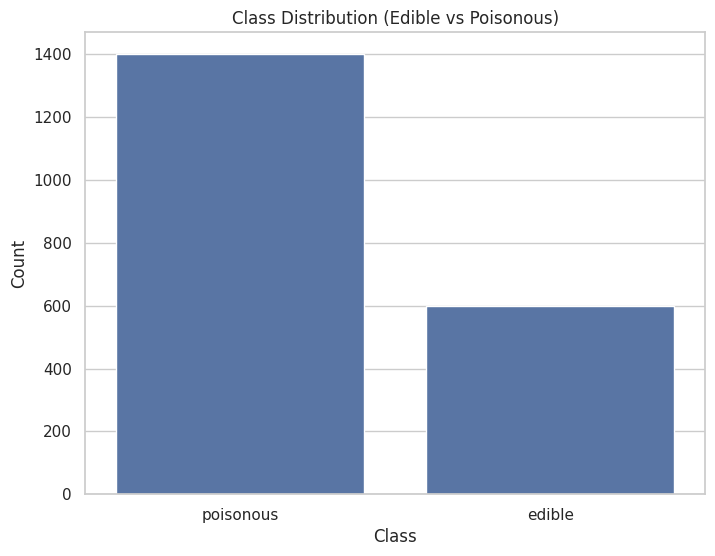


Accuracy of the SVM Classifier: 0.67

Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       133
        True       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


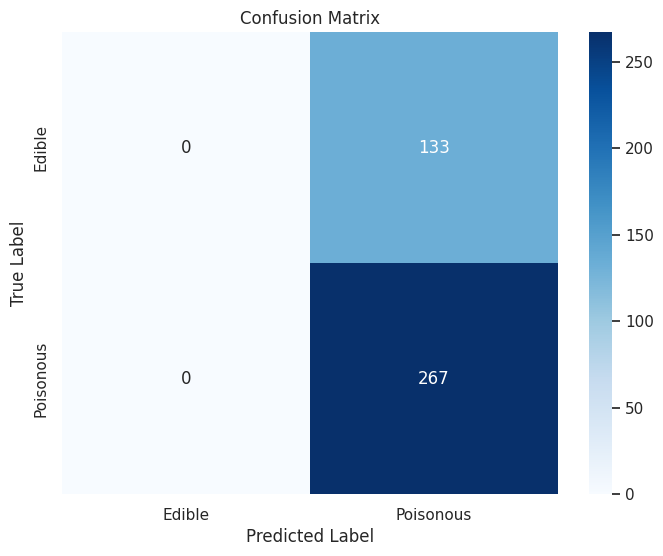

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import mutual_info_classif
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV

# Load the dataset
mushroom = pd.read_csv('mushroom.csv')

# Display dataset info
print("Information about the dataset")
print(mushroom.info())
print(mushroom.describe())

# Check for missing values
print("\nMissing values in each column:")
print(mushroom.isnull().sum())

# Encode categorical features using one-hot encoding
mushroom_encoded = pd.get_dummies(mushroom, drop_first=True)

# Correlation Heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(mushroom_encoded.corr(), cmap='coolwarm', annot=False, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Mushroom Features')
plt.show()

# Compute Mutual Information Scores
X = mushroom_encoded.drop('class_poisonous', axis=1)  # Features
y = mushroom_encoded['class_poisonous']  # Target
mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print("\nMutual Information Scores:")
print(mi_scores)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=mushroom)
plt.title('Class Distribution (Edible vs Poisonous)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Train SVM model
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the SVM Classifier: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


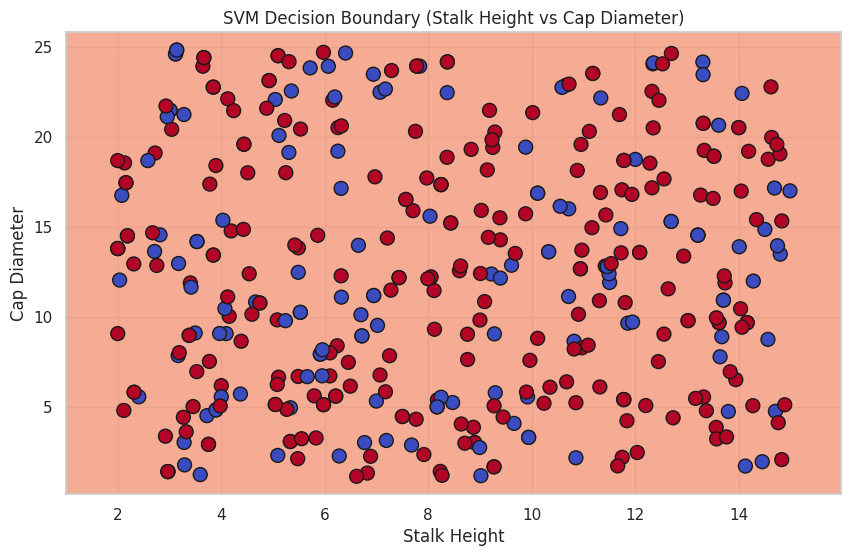

In [ ]:
#Decision Boundary Plot for 2 numerical features

# Select only the two features for visualization
X_train_2_features = X_train[['stalk_height', 'cap_diameter']]
X_test_2_features = X_test[['stalk_height', 'cap_diameter']]

#Train a new SVM model with these two features
svm_classifier_2_features = SVC()
svm_classifier_2_features.fit(X_train_2_features, y_train)

#Create a mesh grid for plotting decision boundaries
import numpy as np
x_min, x_max = X_test_2_features['stalk_height'].min() - 1, X_test_2_features['stalk_height'].max() + 1
y_min, y_max = X_test_2_features['cap_diameter'].min() - 1, X_test_2_features['cap_diameter'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

#Use the new SVM model to predict across the grid
Z = svm_classifier_2_features.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_test_2_features['stalk_height'], X_test_2_features['cap_diameter'], c=y_test, edgecolors='k', marker='o', s=100, cmap=plt.cm.coolwarm)
plt.title('SVM Decision Boundary (Stalk Height vs Cap Diameter)')
plt.xlabel('Stalk Height')
plt.ylabel('Cap Diameter')
plt.show()


In [ ]:
                             #Parameter Tuning and Optimization

# Define a list of hyperparameters to try
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
C_values = [0.1, 1, 10]

# Iterate over kernel types and regularization parameters
for kernel in kernels:
    for C in C_values:
        # Initialize the SVM classifier with specific kernel and C
        svm_classifier = SVC(kernel=kernel, C=C)

        # Train the model on the training data
        svm_classifier.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = svm_classifier.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Print results
        print(f"Kernel: {kernel}, C: {C}")
        print(f"Accuracy: {accuracy:.2f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        print("-" * 50)


Kernel: linear, C: 0.1
Accuracy: 0.67

Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       133
        True       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Kernel: linear, C: 1
Accuracy: 0.68

Classification Report:
              precision    recall  f1-score   support

       False       0.55      0.12      0.20       133
        True       0.68      0.95      0.80       267

    accuracy                           0.68       400
   macro avg       0.62      0.54      0.50       400
weighted avg       0.64      0.68      0.60       400

--------------------------------------------------
Kernel: linear, C: 10
Accuracy: 0.67

Classification Report:
              precision    recall  f1-score   support

       False       0.51      0.20      0.29       133
        True       0.69      0.90      0.79       267

    accuracy                           0.67       400
   macro avg       0.60      0.55      0.54       400
weighted avg       0.63      0.67      0.62       400

--------------------------------------------------
Kernel: poly, C: 0.1
Accuracy: 0.67

Classification Report:
              precision    recall  f1-score   support

       F

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Kernel: poly, C: 1
Accuracy: 0.67

Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       133
        True       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Kernel: poly, C: 10
Accuracy: 0.67

Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       133
        True       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Kernel: rbf, C: 0.1
Accuracy: 0.67

Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       133
        True       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Kernel: rbf, C: 1
Accuracy: 0.67

Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       133
        True       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Kernel: rbf, C: 10
Accuracy: 0.67

Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       133
        True       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Kernel: sigmoid, C: 0.1
Accuracy: 0.60

Classification Report:
              precision    recall  f1-score   support

       False       0.37      0.27      0.31       133
        True       0.68      0.77      0.72       267

    accuracy                           0.60       400
   macro avg       0.52      0.52      0.52       400
weighted avg       0.58      0.60      0.58       400

--------------------------------------------------
Kernel: sigmoid, C: 1
Accuracy: 0.59

Classification Report:
              precision    recall  f1-score   support

       False       0.38      0.33      0.35       133
        True       0.69      0.73      0.71       267

    accuracy                           0.59       400
   macro avg       0.53      0.53      0.53       400
weighted avg       0.58      0.59      0.59       400

--------------------------------------------------
Kernel: sigmoid, C: 10
Accuracy: 0.59

Classification Report:
              precision    recall  f1-score   support

   

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_dist = {
    'C': np.logspace(-3, 3, 7),  # Fewer values for C
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel types to explore
    'gamma': ['scale', 'auto'],  # Fewer options for gamma
}

# Initialize the SVM model
svm = SVC()

# Initialize RandomizedSearchCV with fewer iterations
random_search = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=10, cv=3, verbose=1, n_jobs=-1)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Print the best parameters and best accuracy score
print(f"Best parameters found: {random_search.best_params_}")
print(f"Best accuracy score: {random_search.best_score_:.2f}")

# Evaluate on the test data
best_svm = random_search.best_estimator_
y_pred = best_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy with best parameters: {accuracy:.2f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits


Kernel: linear
Accuracy: 0.68
Classification Report:
              precision    recall  f1-score   support

       False       0.55      0.12      0.20       133
        True       0.68      0.95      0.80       267

    accuracy                           0.68       400
   macro avg       0.62      0.54      0.50       400
weighted avg       0.64      0.68      0.60       400

--------------------------------------------------
Kernel: poly
Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       133
        True       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Kernel: rbf
Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       133
        True       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400

--------------------------------------------------
Kernel: sigmoid
Accuracy: 0.59
Classification Report:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       False       0.38      0.33      0.35       133
        True       0.69      0.73      0.71       267

    accuracy                           0.59       400
   macro avg       0.53      0.53      0.53       400
weighted avg       0.58      0.59      0.59       400

--------------------------------------------------


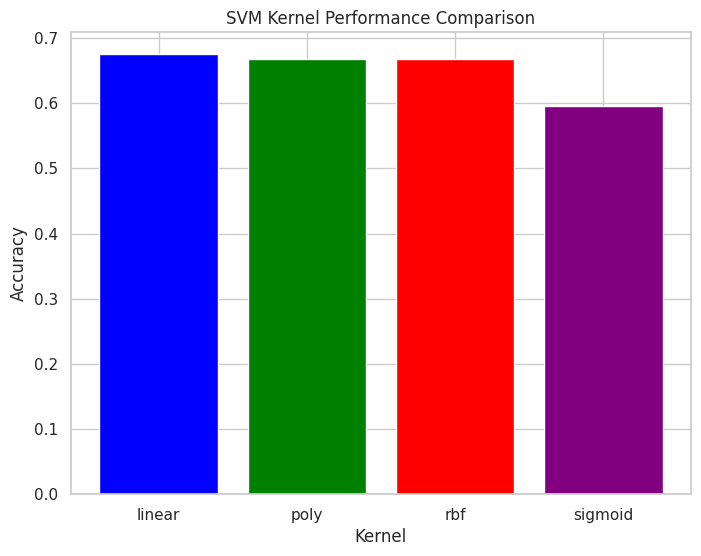

In [ ]:
# List of kernels to evaluate
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Dictionary to store results
results = {}

# Iterate through each kernel type
for kernel in kernels:
    # Initialize and train the SVM model
    svm_classifier = SVC(kernel=kernel)
    svm_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = svm_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store the results
    results[kernel] = accuracy

    # Print the classification report
    print(f"Kernel: {kernel}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# Plot the accuracies for comparison
plt.figure(figsize=(8, 6))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple'])
plt.title('SVM Kernel Performance Comparison')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.show()
